In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

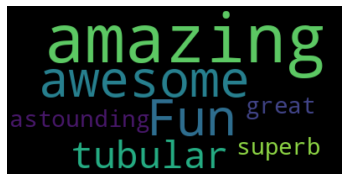

In [3]:

text = 'Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing'

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
feed = pd.read_excel('data/Spring23 Survey (Responses).xlsx')

good_list = feed['What areas do you think the team did well in? '].str.split(', ').explode().tolist()
good_df = pd.DataFrame(good_list, columns=['good'])
good_df['count'] = 1
good_df = good_df.groupby('good')['count'].sum().reset_index()
good_df['text'] = good_df['good'] +  '-GOOD'

bad_list = feed['What areas do you think the team did poorly in? '].str.split(', ').explode().tolist()
bad_df = pd.DataFrame(bad_list, columns=['bad'])
bad_df['count'] = 1
bad_df = bad_df.groupby('bad')['count'].sum().reset_index()
bad_df['text'] = bad_df['bad'] + '-BAD'

do_more_list = feed['What should we do more of next season?'].str.split(', ').explode().tolist()
do_more_df = pd.DataFrame(do_more_list, columns=['do_more'])
do_more_df['count'] = 1
do_more_df = do_more_df.groupby('do_more')['count'].sum().reset_index()
do_more_df['text'] = do_more_df['do_more'] + '-DO MORE'

general_list = feed['Open ended suggestions, comments, critiques:'].str.split(', ').explode().tolist()
general_df = pd.DataFrame(general_list, columns=['general'])
general_df['count'] = 1
general_df = general_df.groupby('general')['count'].sum().reset_index()
general_df['text'] = general_df['general']


fulltext = pd.concat([good_df[['count', 'text']], bad_df[['count', 'text']], do_more_df[['count', 'text']], general_df[['count', 'text']]], ignore_index=True)


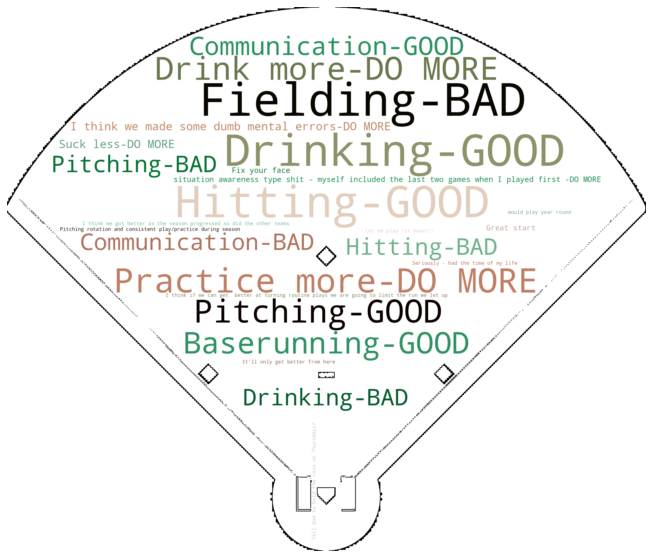

In [51]:

def generate_weighted_word_cloud(sentences, counts, image_path):
    # Create a dictionary of word frequencies based on counts
    word_frequencies = dict(zip(sentences, counts))

    mask = np.array(Image.open(image_path))
    
    # Extract color palette from the image
    image_colors = np.array(Image.open(image_path).convert('RGBA'))
    color_palette = np.unique(image_colors.reshape(-1, image_colors.shape[2]), axis=0).tolist()
    
    # Define a color function based on the image colors
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return tuple(color_palette[np.random.randint(len(color_palette))])
    


    # Create the WordCloud object with word frequencies
    wordcloud = WordCloud(width=3000, height=1500, background_color='white',contour_color='black',contour_width=3,  relative_scaling=0.2, min_font_size=20, max_font_size=200,max_words=500, mask=mask, colormap=None, color_func=color_func)
    wordcloud.generate_from_frequencies(word_frequencies)
    
    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('assets/wordcloud.png', dpi=300)

    plt.show()

# Example usage
sentences = fulltext['text'].tolist()
counts = fulltext['count'].tolist()
image_path = 'assets/diamond2.jpg'
generate_weighted_word_cloud(sentences, counts, image_path)


In [13]:
sentences

['Baserunning - GOOD',
 'Communication - GOOD',
 'Drinking - GOOD',
 'Hitting - GOOD',
 'Pitching - GOOD',
 'Communication - BAD',
 'Drinking - BAD',
 'Fielding - BAD',
 'Hitting - BAD',
 'Pitching - BAD',
 'Drink more - DO MORE',
 'I think we made some dumb mental errors - DO MORE',
 'Practice more - DO MORE',
 'Suck less - DO MORE',
 'situation awareness type shit - myself included the last two games when I played first  - DO MORE',
 'Fix your face',
 'Great start',
 'I think if we can get  better at turning routine plays we are going to limit the run we let up\n\nSeriously - had the time of my life.. would play year round',
 'I think we got better as the season progressed so did the other teams',
 "It'll only get better from here",
 'Let me play 1st base!!!',
 'Pitching rotation and consistent play/practice during season',
 'Tell God to hold the rain on Thursdays? ']